## **Importação das bibliotecas e dados (AEP e Duas Unas)**

In [287]:
#%pip install ipykernel
# %pip install scikit-learn
# %pip install matplotlib
# %pip install keras
# %pip install tensorflow
# %pip install pandas
# %pip install plotly
#%pip install seaborn
#%pip install nbformat





In [288]:
import numpy as np    #Biblioteca matemática
import pandas as pd   #Biblioteca para manipulação de dados
import matplotlib.pyplot as plt #Biblioteca gráfica
import tensorflow as tf #Biblioteca para machine learning
import sklearn.preprocessing #Biblioteca para machine learning
import random
import keras
import plotly.express as px #Biblioteca gráfica
import seaborn as sns #Biblioteca gráfica e estatística
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from tensorflow.keras import backend as K
from tensorflow.keras.initializers import GlorotUniform    #Inicializador de pesos
from keras.regularizers import l1_l2
from tensorflow.keras.models import load_model

from keras.layers import Dense,Dropout,SimpleRNN,LSTM #Biblioteca para deep learning
from keras.models import Sequential

#tf.keras.utils.set_random_seed(1234)

# Mecanismo de Atenção
from keras.layers import Layer
import keras.backend as K

base_path = './dataset/'

In [289]:
#Busca dos dados de pré-treinamento no drive (AEP DATASET)

path1 = f'{base_path}AEP_hourly.csv'
print(path1)
dados = pd.read_csv(path1,sep=',', encoding='iso-8859-1') #, index_col='Data', parse_dates=['Data'])
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)


./dataset/AEP_hourly.csv


In [290]:
#Busca dos dados de treinamento no drive (DUAS UNAS DATASET)

path2 = f'{base_path}EEAB_DUAS_UNAS.csv'
dados2 = pd.read_csv(path2,sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

## **Dados de Pré-treinamento (AEP)**


In [291]:
dados = dados.sort_values(by='DateTime')
dados = dados.set_index('DateTime')
dados

kWh fornecido
DateTime                          
2004-10-01 01:00:00        12379.0
2004-10-01 02:00:00        11935.0
2004-10-01 03:00:00        11692.0
2004-10-01 04:00:00        11597.0
2004-10-01 05:00:00        11681.0
...                            ...
2018-08-02 20:00:00        17673.0
2018-08-02 21:00:00        17303.0
2018-08-02 22:00:00        17001.0
2018-08-02 23:00:00        15964.0
2018-08-03 00:00:00        14809.0

[121273 rows x 1 columns]

In [292]:
hist1 = px.histogram(dados, x = 'kWh fornecido', nbins = 60)  #Histograma kWh fornecido
hist1.update_layout(width = 800, height = 400, title_text = 'Distribuição das Potências')
hist1.show()

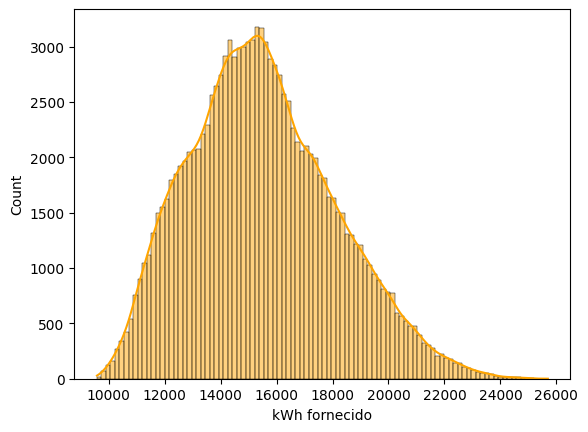

In [293]:
sns.histplot(dados, x='kWh fornecido', bins=100, color="orange", kde=True, stat="count");  # kde=true - plota linha de tendência da densidade

In [294]:
px.box(dados, y='kWh fornecido')  #Boxplot - Visualização dos outliers

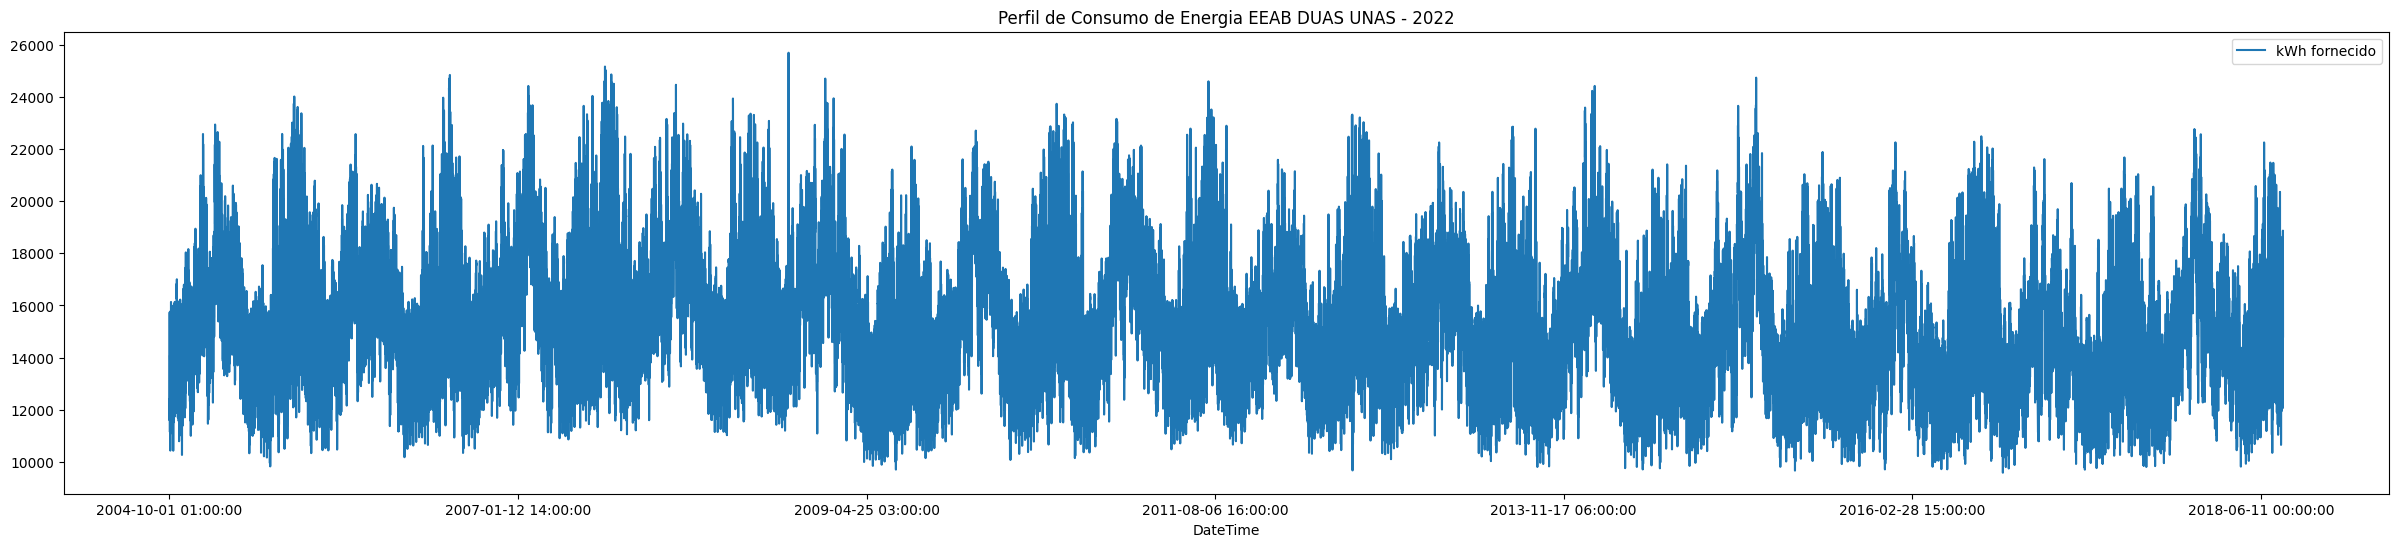

In [295]:
dados['kWh fornecido'].astype(float)
dados.plot(figsize=(30,6),legend=True)  #Gráfico PJME_MW ao longo dos 16 anos

plt.title('Perfil de Consumo de Energia EEAB DUAS UNAS - 2022')

plt.show()

## **Dados de Treinamento (Duas Unas)**

In [296]:
#Ajustar o tipo do dado 'hora'
dados2['Hora'].astype(int)
dados2['Hora'].dtypes

dtype('int64')

In [297]:
#Função para inserir dígitos '0' nas horas
def horas(number):
    if number == 24:
      hora = '00:00'
    else:
      if number < 10:
        hora = '0'+str(number)+':00'
      else:
        hora = str(number)[:]+':00'
    return hora

In [298]:
#Inserir dígitos '0' nas horas
for i in range(len(dados2)):
  dados2['Hora'].iloc[i] = horas(dados2['Hora'].iloc[i])

C:\Users\Renan Torres\AppData\Local\Temp\ipykernel_12720\2307152359.py:3: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\Renan Torres\AppData\Local\Temp\ipykernel_12720\2307152359.py:3: SettingWithCopyWarning:


A value is trying to 

In [299]:
#Correção da data na hora 00:00h
for i in range(len(dados2)-1):
  if (dados2['Hora'].iloc[i] == '00:00'):
    dados2['Data'].iloc[i] = dados2['Data'].iloc[i+1]

C:\Users\Renan Torres\AppData\Local\Temp\ipykernel_12720\3263371494.py:4: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\Renan Torres\AppData\Local\Temp\ipykernel_12720\3263371494.py:4: SettingWithCopyWarning:


A value is trying to 

In [300]:
#Retirada da última linha de dado - data errada
dados2 = dados2[:len(dados2)-1]
dados2.tail()

Data   Hora  kWh fornecido
7458  06/08/2024  19:00         949.68
7459  06/08/2024  20:00         951.84
7460  06/08/2024  21:00         952.56
7461  06/08/2024  22:00         953.64
7462  06/08/2024  23:00         954.36

In [301]:
#Transformação da matriz de dados em dataframe, aglutinação das colunas de 'data' e 'hora' em uma só, configuração do dado 'datetime', ordenação das linhas por 'datetime', transformação da coluna 'Datetime' em índice do dataframe e exclusão das colunas 'data' e 'hora'
dados2 = pd.DataFrame(dados2, columns =['Data','Hora','kWh fornecido'])
dados2['DateTime'] = dados2['Data'] + ' ' + dados2['Hora']
dados2['DateTime'] = pd.to_datetime(dados2['DateTime'], format='%d/%m/%Y %H:%M') # Use the correct format string
dados2 = dados2.sort_values(by='DateTime')
dados2 = dados2.set_index('DateTime')
dados2 = dados2.drop(['Data', 'Hora'], axis=1)
dados2.tail()

kWh fornecido
DateTime                          
2024-08-06 19:00:00         949.68
2024-08-06 20:00:00         951.84
2024-08-06 21:00:00         952.56
2024-08-06 22:00:00         953.64
2024-08-06 23:00:00         954.36

In [302]:
#CÉLULA APENAS PARA DADOS DIÁRIOS
# dados2 = pd.DataFrame(dados2, columns =['Data','kWh fornecido'])
# dados2 = dados2.sort_values(by='Data')
# dados2 = dados2.set_index('Data')
# dados2['kWh fornecido'].astype(float)
# dados2['kWh fornecido'].dtypes

In [303]:
#Histograma dos dados
hist1 = px.histogram(dados2, x = 'kWh fornecido', nbins = 60)  #Histograma kWh fornecido
hist1.update_layout (width = 600, height = 400, title_text = 'Distribuição das Potências')
hist1.show()

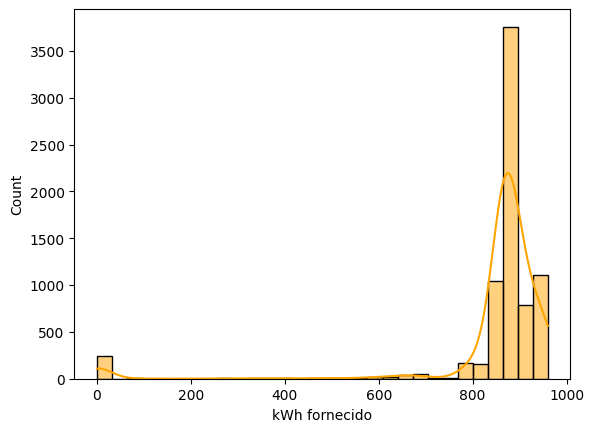

In [304]:
#Curva de tendência dos dados
sns.histplot(dados2, x='kWh fornecido', bins=30, color="orange", kde=True, stat="count");  # kde=true - plota linha de tendência da densidade

In [305]:
#Boxplot - Visualização dos outliers
px.box(dados2, y='kWh fornecido')

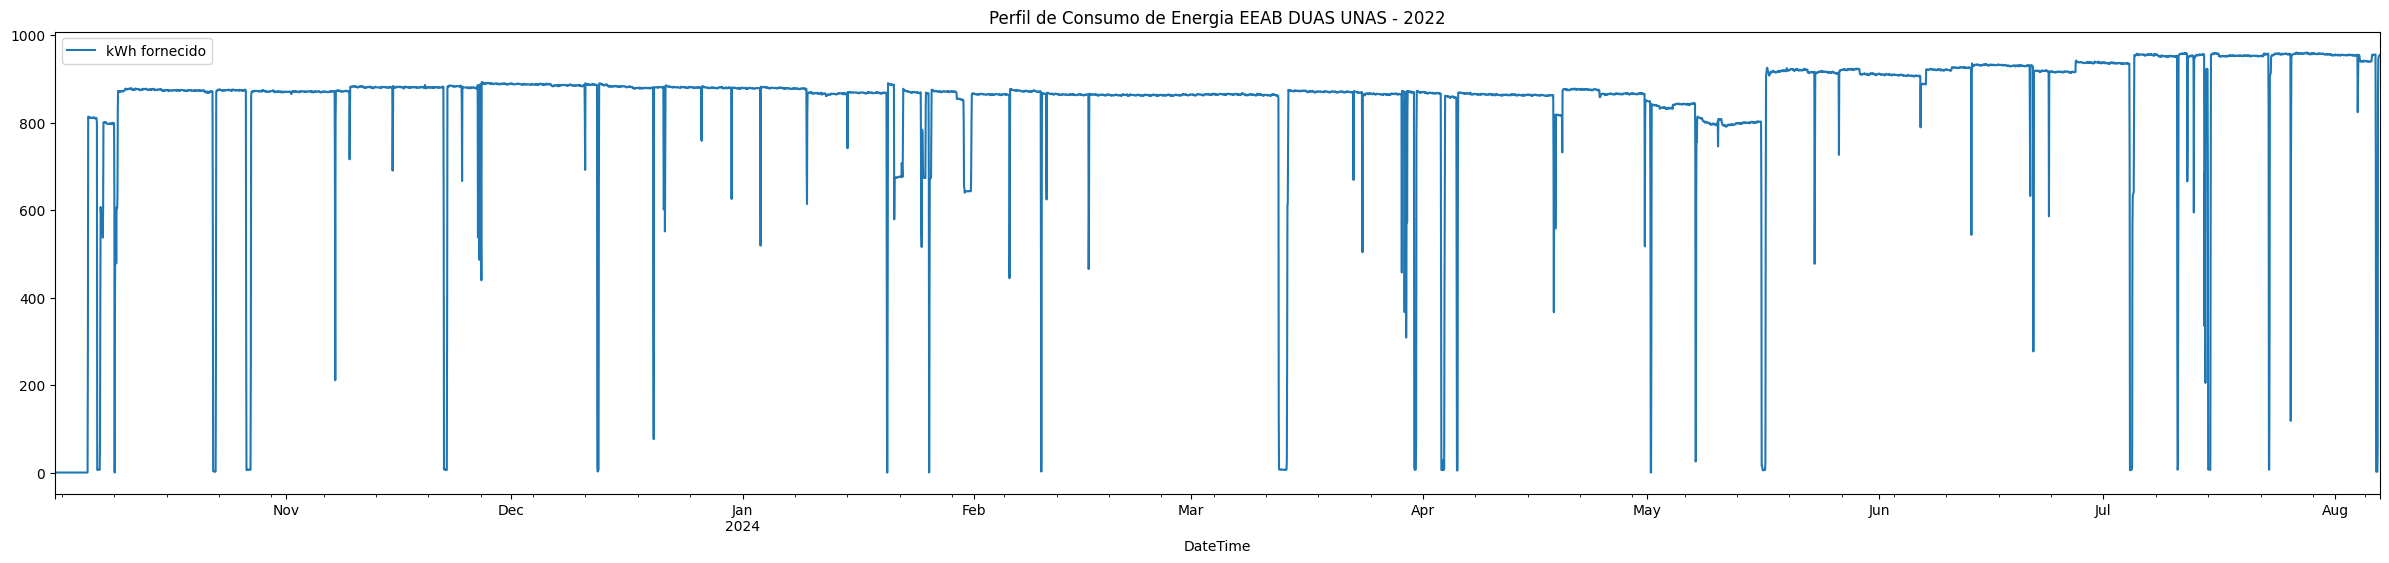

In [306]:
dados2['kWh fornecido'].astype(float)
dados2.plot(figsize=(30,6),legend=True)  #Gráfico PJME_MW ao longo dos 16 anos

plt.title('Perfil de Consumo de Energia EEAB DUAS UNAS - 2022')

plt.show()

In [307]:
dados2 = dados2.iloc[119:]
dados2.head()

kWh fornecido
DateTime                          
2023-10-06 00:00:00         811.44
2023-10-06 01:00:00         810.72
2023-10-06 02:00:00         810.36
2023-10-06 03:00:00         810.36
2023-10-06 04:00:00         811.08

In [308]:
somatorio = 0
for i in range(len(dados2)-1):
  if dados2['kWh fornecido'].iloc[i] < 750:
    for j in range(24,0,-1):
      somatorio += dados2['kWh fornecido'].iloc[i-j]
      #print(dados2['kWh fornecido'].iloc[i]
    dados2['kWh fornecido'].iloc[i] = somatorio/24
    somatorio = 0

C:\Users\Renan Torres\AppData\Local\Temp\ipykernel_12720\3488031571.py:7: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\Renan Torres\AppData\Local\Temp\ipykernel_12720\3488031571.py:7: SettingWithCopyWarning:


A value is trying to 

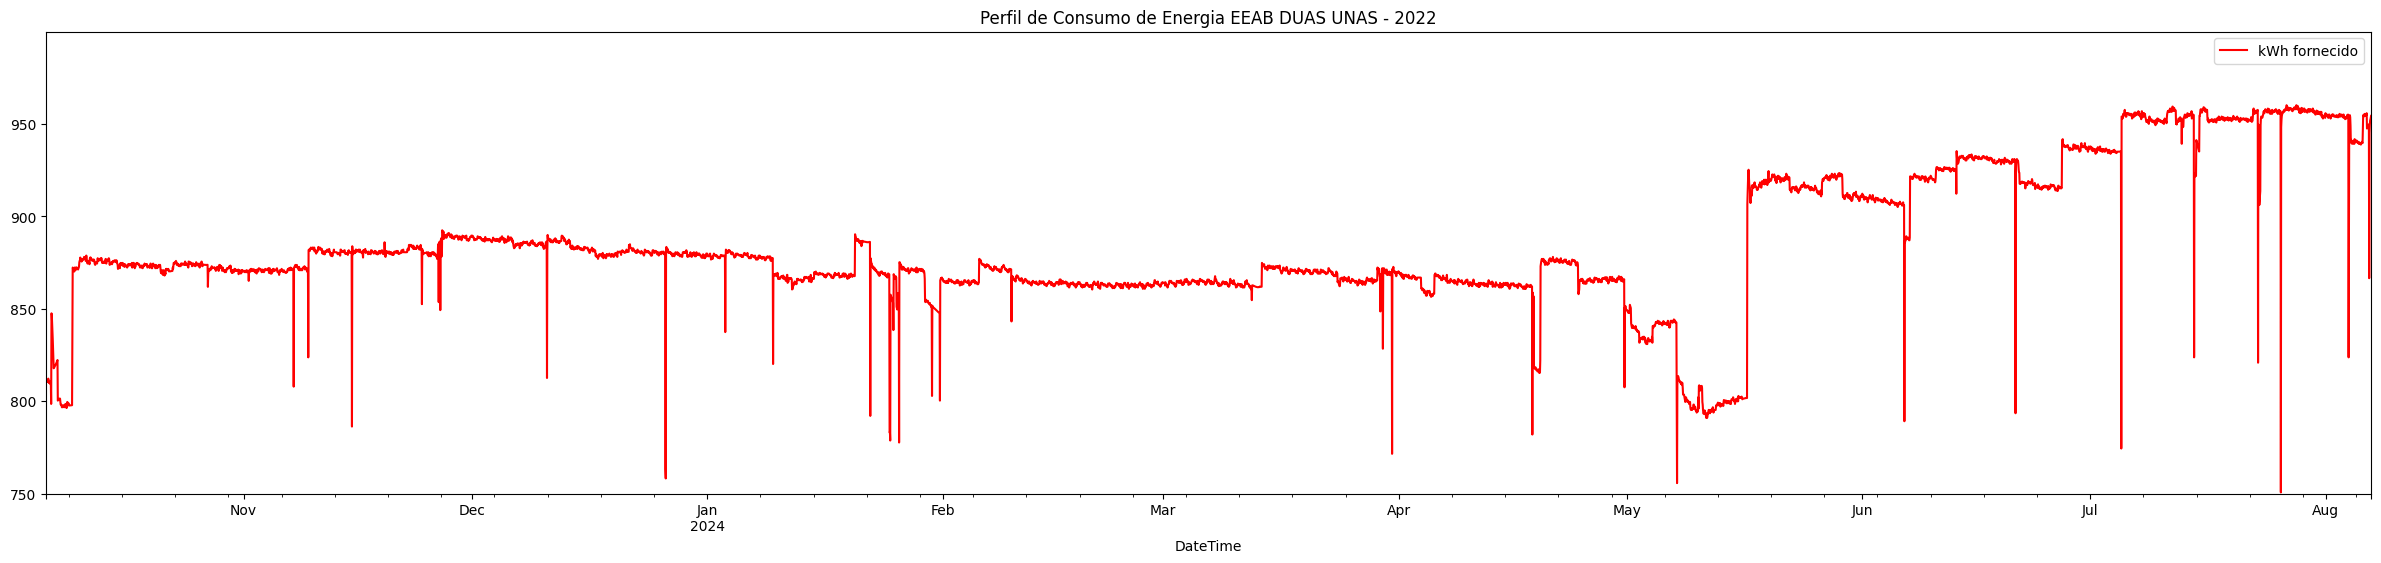

In [309]:
dados2['kWh fornecido'].astype(float)
dados2.plot(figsize=(30,6),legend=True, color = 'red')  #Gráfico PJME_MW ao longo dos 16 anos

plt.title('Perfil de Consumo de Energia EEAB DUAS UNAS - 2022')
plt.yticks(np.arange(0,1000,step=50))
plt.ylim((750,1000))
plt.show()

## **Normalização dos dados**




In [310]:
# Padronização MinMax
#def padronizacao(dados):
#  min = dados.min().iloc[0]
#  max = dados.max().iloc[0]
#  print(min)
#  print(max)
#  de_padr = []
#  for i in range(len(dados)-1):
#    valor = dados.iloc[i,0]
#    valor = valor - min
#    valor = valor/[max-min]
#    de_padr.append(valor)

#  return pd.DataFrame(de_padr)

In [311]:
scaler = MinMaxScaler()
def MinMax(dados):
  max = dados.max().iloc[0]
  min = dados.min().iloc[0]
  scaled_data = scaler.fit_transform(dados)
  return pd.DataFrame(scaled_data), max, min


In [312]:
#Estatística dos dados AEP
dados.describe()

kWh fornecido
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000

In [313]:
df_AEP,max_AEP,min_AEP = MinMax(dados)

In [314]:
def plot_dadospadronizados(dados):
  dados.plot(figsize=(30,6),color = 'red',legend=True)  #Gráfico PJME_MW ao longo dos 16 anos

  plt.title('Perfil de Consumo de Energia EEAB DUAS UNAS - 2022')
  plt.yticks(np.arange(0,1.1,step=0.1))
  plt.show()

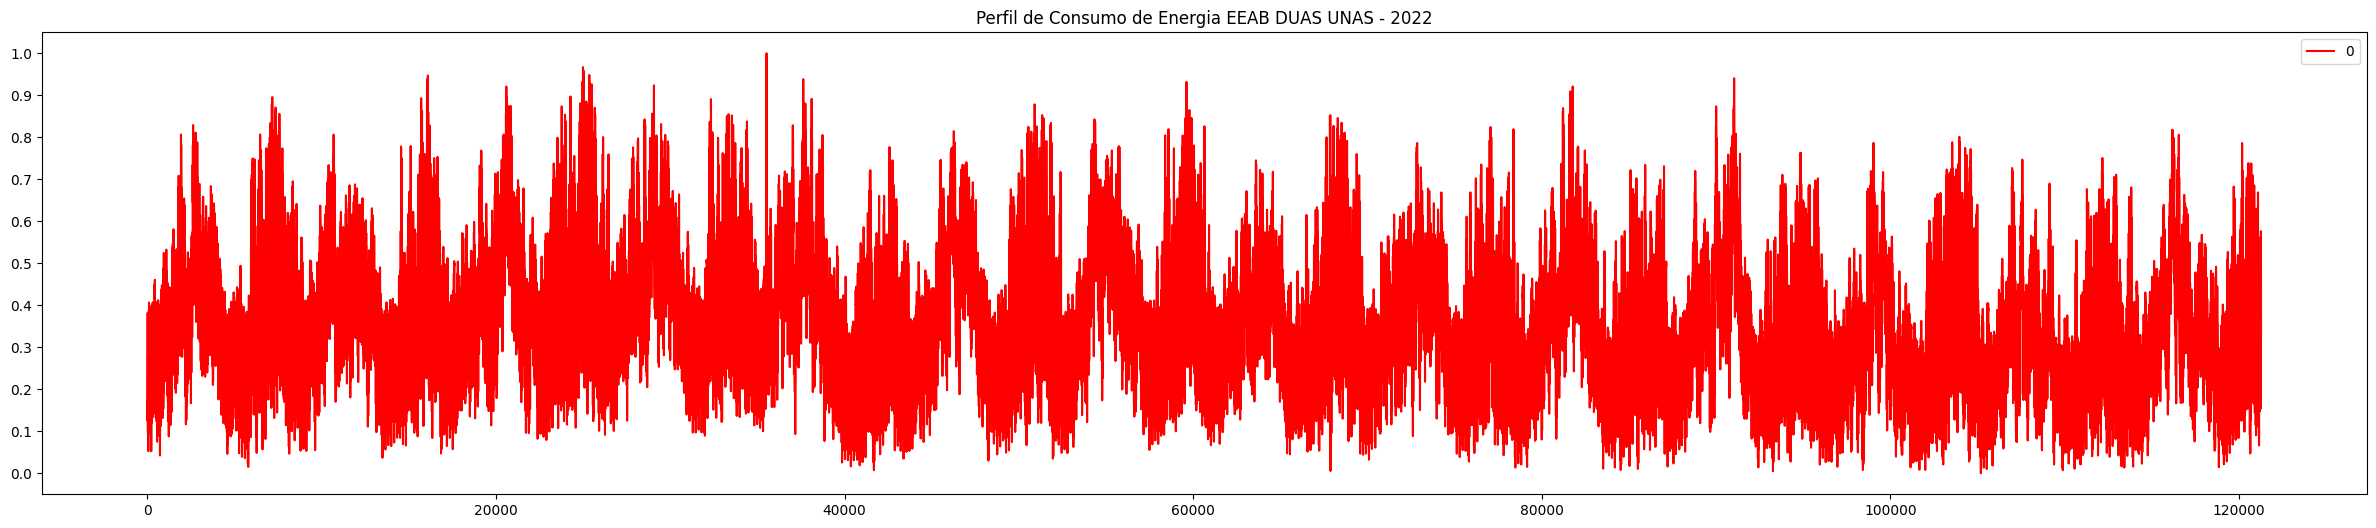

In [315]:
plot_dadospadronizados(df_AEP)

In [316]:
#Estatística dados Duas Unas
dados2.describe()

kWh fornecido
count    7344.000000
mean      884.529012
std        35.605440
min       750.600000
25%       865.080000
50%       874.800000
75%       909.360000
max       960.120000

In [317]:
df_DU,max_DU,min_DU = MinMax(dados2)
print(max_DU)
print(min_DU)


960.12
750.6


In [318]:
df_DU.describe()

0
count  7344.000000
mean      0.639218
std       0.169938
min       0.000000
25%       0.546392
50%       0.592784
75%       0.757732
max       1.000000

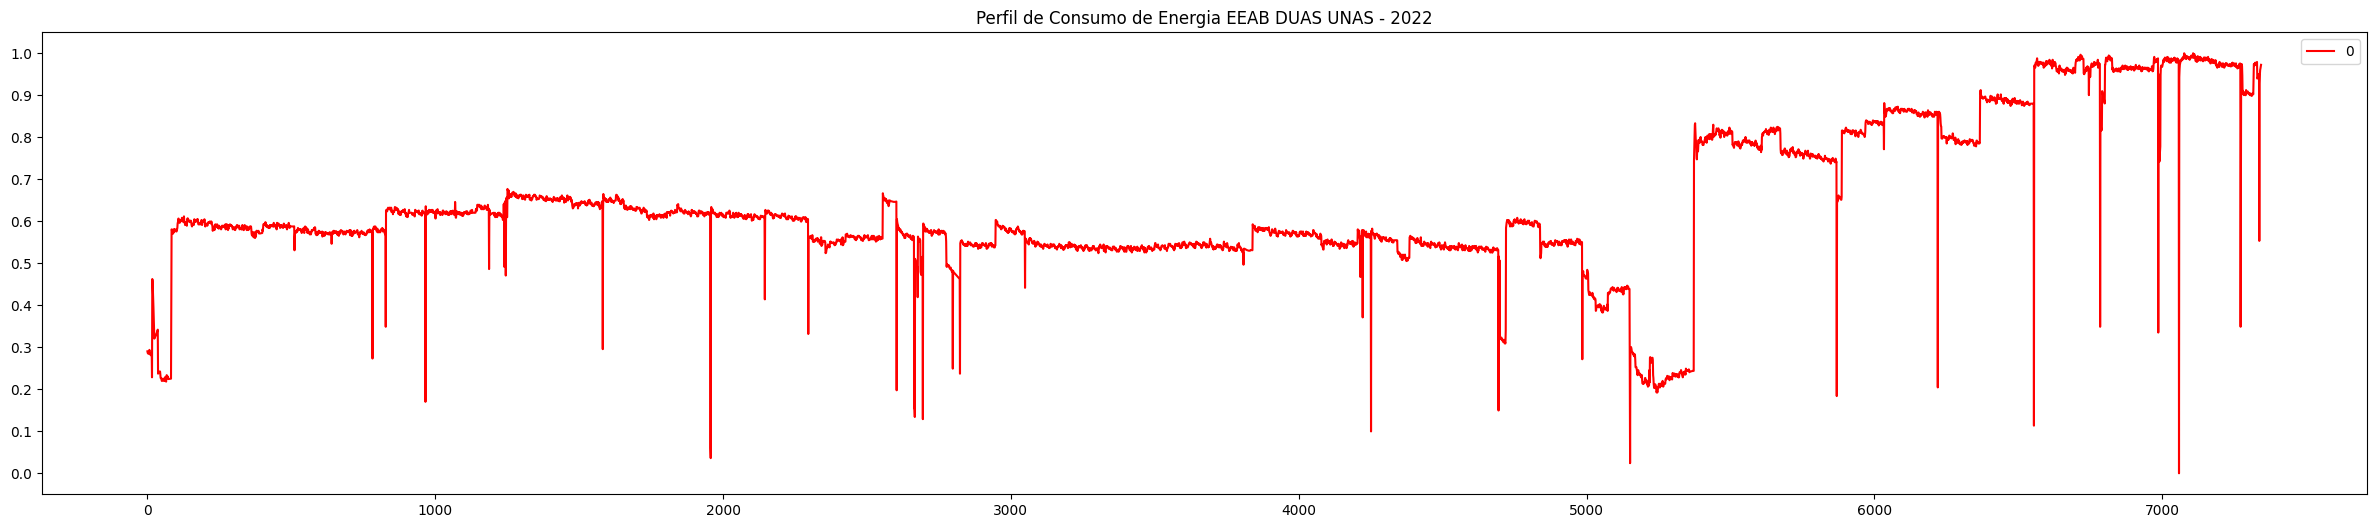

In [319]:
plot_dadospadronizados(df_DU)

## **Treino e Teste**

In [320]:
class attention(Layer):
    #def __init__(self,**kwargs):
    #   self.return_sequences = return_sequences
    #   super(attention,self).__init__(**kwargs)

    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()

# PESOS E BIAS
    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal") # Pesos
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros") # Bias
        super(attention, self).build(input_shape)

# VETOR DE CONTEXTO
    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1) # Produto escalar entre pesos e entradas e soma com bias
        at=K.softmax(et) # Normalização para que o somatório dos pesos seja = 1
        at=K.expand_dims(at,axis=-1)
        output=x*at # Saída (peso-at * entrada-x)
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [321]:
def load_data(stock, seq_len,out_steps, perc_train, perc_test):  # stock == de_df     seq_len == 20
    train = perc_train
    test = perc_test
    y_plot = []
    X_train = []
    y_train = []   #  20       145366
    for i in range(seq_len, len(stock)- out_steps + 1):
        X_train.append(stock.iloc[i-seq_len : i, 0])   # Cria, em cada posição de X_train, um vetor coluna [20,1] com as entradas de cada sequência
        y_train.append(stock.iloc[i:i+out_steps, 0])   # Armazena, em cada posição de Y_train, o valor de saída (valor seguinte) correspondente à saída esperada
        y_plot.append(stock.iloc[i,0])
                                           # quando o vetor coluna [20,1] de mesma posição em X_train for adicionado à entrada
    #1 last 25346 data are going to be used in test
    X_test = X_train[round(train*len(stock)):len(stock)]   # [120000:] # Os vetores colunas das posições 120.000 - final serão utilizados como entrada na etapa de teste
    y_test = y_train[round(train*len(stock)):len(stock)]   # [120000:] # Os valores nas posições 120.000 - final serão utilizados como saída na etapa de teste
    y_plot = y_plot[round(train*len(stock)):len(stock)]

    #2 first 120000 data are going to be used in training
    X_train = X_train[:round(train*len(stock))]  # [:120000] # Os vetores colunas das posições 0 - 119.999 serão utilizados como entrada na etapa de treino
    y_train = y_train[:round(train*len(stock))]  # [:120000] # Os valores nas posições 0 - 119.999 serão utilizados como saída na etapa de treino

    #3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_plot = np.array(y_plot)

    #4 reshape data to input into RNN models
                                 # 120000
    X_train = np.reshape(X_train, (round(train*len(stock)), seq_len, 1))   #Reorganiza X_train e a transforma numa matriz [120000,20,1], sendo uma sequência por linha

    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))   #Reorganiza X_teste e a transforma numa matriz [25346,20,1], sendo uma sequência por linha

    return [X_train, y_train, X_test, y_test, y_plot]


In [322]:
seq_len = 200 #Comprimento da sequência       ????????
out_steps = 1 #Comprimento do vetor de saída

In [323]:
#Train e Test Data dados AEP

# X_train_A, y_train_A, X_test_A, y_test_A, y_plot_A = load_data(df_AEP, seq_len, out_steps, 0.7, 0.3)   #Chama a função load_data

# print('X_train.shape = ',X_train_A.shape)   #Printa a dimensionalidade de X_train, y_train, X_test, y_test
# print('y_train.shape = ', y_train_A.shape)
# print('X_test.shape = ', X_test_A.shape)
# print('y_test.shape = ',y_test_A.shape)
# print('y_plot.shape = ',y_plot_A.shape)

In [324]:
X_train_U, y_train_U, X_test_U, y_test_U, y_plot_U = load_data(df_DU, seq_len, out_steps, 0.5, 0.5)   #Chama a função load_data

print('X_train.shape = ',X_train_U.shape)   #Printa a dimensionalidade de X_train, y_train, X_test, y_test
print('y_train.shape = ', y_train_U.shape)
print('X_test.shape = ', X_test_U.shape)
print('y_test.shape = ',y_test_U.shape)
print('y_plot.shape = ',y_plot_U.shape)

X_train.shape =  (3672, 200, 1)
y_train.shape =  (3672, 1)
X_test.shape =  (3472, 200, 1)
y_test.shape =  (3472, 1)
y_plot.shape =  (3472,)


In [325]:
# Verificando se nos dados de entrada e saída há NaN ou infinitos
print(np.any(np.isnan(X_train_U)), np.any(np.isnan(y_train_U)))
print(np.any(np.isinf(X_train_U)), np.any(np.isinf(y_train_U)))

print(np.any(np.isnan(X_test_U)), np.any(np.isnan(y_test_U)))
print(np.any(np.isinf(X_test_U)), np.any(np.isinf(y_test_U)))

False False
False False
False False
False False


In [326]:
#   ETAPA DE MODELAGEM DA REDE LSTM

# Busca de hiperparâmetros (random search)

lstm_model = Sequential()   # Modo sequencial - saída de uma camada é aplicada na entrada da seguinte
      #       (Dimensionalidade da saída, função de ativação, deve retornar a última saída na saída, dimensionalidade da entrada (20,1)

#Saulo não define a função de ativação. Default: hyperbolic tangent (tanh)

                                                          #X_train.shape[1]
lstm_model.add(LSTM(100,return_sequences=True, input_shape=(seq_len,1))) # Apenas a primeira camada informa input_shape. As demais fazem inferência
lstm_model.add(Dropout(0.3)) # Taxa de atenuação aplicada à saída para evitar overfitting - Elimina aleatoriamente alguns neurônios

lstm_model.add(LSTM(100,return_sequences=True))
lstm_model.add(Dropout(0.3))

lstm_model.add(LSTM(100,return_sequences=False)) #Anteriormente era FALSE. Foi alterado devido à adição da camada Attention
lstm_model.add(Dropout(0.3))

# ATTENTION #
#lstm_model.add(attention(return_sequences=False))

lstm_model.add(Dense(1)) # Dense - Camada totalmente conectada com dimensionalidade de saída igual a 1

lstm_model.summary() # Printa um sumário da rede

c:\Users\Renan Torres\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 200, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 200, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 200, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 200, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [327]:
def rmse(y_true, y_pred):
    mse = K.mean(K.square(y_pred - y_true), axis=-1)
    return K.sqrt(mse)

In [328]:
#    ETAPA DE TREINAMENTO
#   Configuração do modelo para treinamento
def treinamento(modelo, X_treino,Y_treino,l_r,batch,paciencia):

    modelo.compile(optimizer=keras.optimizers.Adam(learning_rate=l_r),loss="MSE")
    # optmizer - função que define como os pesos da rede neural são atualizados
    # adam - método estocástico do gradiente descendente
    # loss - função de calcula a diferença entre os dados de teste e os dados de validação
    # MSE - erro quadrático médio
    # Learning rate - PESQUISAR

    # callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    # = EarlyStopping(monitor='val_loss', verbose=1), patience=50
                                               #batch_size=500                                                                                             #patience=15
    history = modelo.fit(X_treino, Y_treino, epochs=100000, batch_size=batch, validation_split=0.3, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=paciencia))   #Treinamento do modelo
    #             (Entrada; saída; ciclos de treinamento com todos os dados; tamanho do lote (1000) que, ao dividir o tamanho da (120.000),
    #              define a quantidade de etapas por ciclo. Após cada etapa, os pesos são atualizados para a próxima etapa.

    # Plotar as perdas de treinamento e validação
    plt.plot(history.history['loss'], label='Loss de Treinamento')
    plt.plot(history.history['val_loss'], label='Loss de Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    plt.show()

In [329]:
def testes(modelo,X_test,y_test):
  
  lstm_predictions_testes = modelo.predict(X_test)  # Gera as previsões de saída para as entradas X_test

  lstm_predictions_testes = np.array(lstm_predictions_testes)
  y_test = np.array(y_test)


#lstm_predictions_valor_real = normal.inverse_transform(lstm_predictions)

#print("Valor real previsto (kWh): ",lstm_predictions_valor_real)

  lstm_score = r2_score(y_test, lstm_predictions_testes)   # Relacionado à regressão linear dos valores verdadeiros. É calculado com base no erro quadrático residual e erro total. O valor pode ser interpretado como a proporção dos valores previstos que estão na linha criada pela regressão.
  print("R^2 Score of LSTM model = ",lstm_score)
  print(" ")

  lstm_score2 = mean_absolute_error(y_test, lstm_predictions_testes)
  print("MAE(Erro absoluto médio) Score of LSTM model = ",lstm_score2)
  print(" ")

  lstm_score3 = mean_squared_error(y_test, lstm_predictions_testes)
  print("MSE(Erro quadrático médio) Score of LSTM model = ",lstm_score3)
  print(" ")

  #lstm_score4 = mean_absolute_percentage_error(y_test, lstm_predictions_testes)
  #print("MAPE(Erro percentual médio absoluto) Score of LSTM model = ",lstm_score4)

  mape = np.mean(np.abs((y_test - lstm_predictions_testes) / y_test)) * 100

  print(f"MAPE(Erro percentual médio absoluto) Score of LSTM model = {mape}%")

#lstm_score5 = cross_val_score(lstm_model, X_test, y_test, cv=3, scoring='neg_mean_squared_error')
#print("MSE(Erro quadrático médio) Score of LSTM model com cross-validation 3 = ",lstm_score5)
  return lstm_predictions_testes

In [330]:
def plot_predictions_univar(test, predicted, title):
    plt.figure(figsize=(100,40))
    plt.grid(True)
    plt.yticks(np.arange(0,750,step=50))
    plt.plot(test, color='blue',label='Actual power consumption data') #Plota y_test
    plt.plot(predicted, alpha=0.7, color='red',label='Predicted power consumption data') #Plota Y previsto
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()

In [331]:
#Pré-treinamento com dados AEP
#treinamento(lstm_model,X_train_A,y_train_A,0.001,500,5)

In [332]:
#pesos_treinamento1 = lstm_model.get_weights()
#pesos_LSTM1_t1 = lstm_model.get_layer(name='lstm').get_weights()
#pesos_LSTM2_t1 = lstm_model.get_layer(name='lstm_1').get_weights()
#pesos_LSTM3_t1 = lstm_model.get_layer(name='lstm_2').get_weights()

In [333]:
#np.savez('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM1_t1.npz',W=pesos_LSTM1_t1[0], U=pesos_LSTM1_t1[1], b=pesos_LSTM1_t1[2])
#np.savez('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM2_t1.npz',W=pesos_LSTM2_t1[0], U=pesos_LSTM2_t1[1], b=pesos_LSTM2_t1[2])
#np.savez('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM3_t1.npz',W=pesos_LSTM3_t1[0], U=pesos_LSTM3_t1[1], b=pesos_LSTM3_t1[2])

In [334]:
#lstm_model.save('lstm_model_HOJE.keras')

In [335]:
#lstm_model.save('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/lstm_model_HOJE')

In [336]:
#lstm_model.save('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/lstm_model_HOJE.keras')

In [337]:
#Testes com os dados AEP
#teste = testes(lstm_model,X_test_A,y_test_A)

In [338]:
#Gráfico comparativo dos valores previstos e reais AEP
#plot_predictions_univar(y_test_A, teste,"Predições para os dados AEP")

In [339]:
#pesos_LSTM1 = keras.models.load_model('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM1_t1.npz')
#pesos_LSTM2 = keras.models.load_model('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM2_t1.npz')
#pesos_LSTM3 = keras.models.load_model('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM3_t1.npz')

In [340]:
caminho_LSTM1 = f'{base_path}/pesos_LSTM1_t1.npz'
caminho_LSTM2 = f'{base_path}/pesos_LSTM2_t1.npz'
caminho_LSTM3 = f'{base_path}/pesos_LSTM3_t1.npz'

In [341]:
# Carregar os pesos salvos
def carregar_pesos(arquivo_pesos_camada):

  with np.load(arquivo_pesos_camada) as data:
      W = data['W']
      U = data['U']
      b = data['b']
      # Os pesos podem ter mais de um conjunto, então você deve garantir que a ordem e o número estejam corretos.
      loaded_weights = [W, U, b]
  return loaded_weights

In [342]:
pesos_LSTM1_t1_carregado = carregar_pesos(caminho_LSTM1)
pesos_LSTM2_t1_carregado = carregar_pesos(caminho_LSTM2)
pesos_LSTM3_t1_carregado = carregar_pesos(caminho_LSTM3)

In [343]:
def comparar_pesos(lista1, lista2):
  """
  Compares two lists of NumPy arrays for equality.

  Args:
    lista1: The first list of NumPy arrays.
    lista2: The second list of NumPy arrays.

  Returns:
    True if all corresponding arrays in the lists are equal, False otherwise.
  """
  if len(lista1) != len(lista2):
    return False
  for i in range(len(lista1)):
    if not np.array_equal(lista1[i], lista2[i]):
      return False
  return True

# # Now you can compare the lists like this:
# sao_iguais = comparar_pesos(pesos_LSTM1_t1, pesos_LSTM1_t1_carregado)
# print(sao_iguais)  # This will print True or False

In [344]:
#print(comparar_pesos(pesos_LSTM1_t1, pesos_LSTM1_t1_carregado))
#print(comparar_pesos(pesos_LSTM2_t1, pesos_LSTM2_t1_carregado))
#print(comparar_pesos(pesos_LSTM3_t1, pesos_LSTM3_t1_carregado))

In [345]:
#   ETAPA DE MODELAGEM DA REDE LSTM

lstm_model_treinado = Sequential()   # Modo sequencial - saída de uma camada é aplicada na entrada da seguinte
      #       (Dimensionalidade da saída, função de ativação, deve retornar a última saída na saída, dimensionalidade da entrada (20,1)

#Saulo não define a função de ativação. Default: hyperbolic tangent (tanh)

                                                          #X_train.shape[1]
lstm_model_treinado.add(LSTM(100,return_sequences=True, input_shape=(seq_len,1),name='lstm_1',activation = 'tanh')) #, kernel_regularizer=l1_l2(l1=0.01, l2=0.01))) # Apenas a primeira camada informa input_shape. As demais fazem inferência
lstm_model_treinado.add(Dropout(0.2)) # Taxa de atenuação aplicada à saída para evitar overfitting - Elimina aleatoriamente alguns neurônios

lstm_model_treinado.add(LSTM(100,return_sequences=True,name='lstm_2',activation = 'tanh')) #, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
lstm_model_treinado.add(Dropout(0.2))

lstm_model_treinado.add(LSTM(100,return_sequences=False,
                             kernel_initializer=GlorotUniform(),  # Inicializador para os pesos
                             recurrent_initializer=GlorotUniform(),  # Inicializador para os pesos recorrentes
                             bias_initializer=GlorotUniform(),name='lstm_3',activation = 'tanh'))  # Inicializador para os biases)) #Anteriormente era FALSE. Foi alterado devido à adição da camada Attention
                             #kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
lstm_model_treinado.add(Dropout(0.2))

# ATTENTION #
#lstm_model.add(attention(return_sequences=False))

lstm_model_treinado.add(Dense(out_steps,
                        kernel_initializer=GlorotUniform(),  # Inicializador para os pesos
                        bias_initializer=GlorotUniform(),  # Inicializador para os biases
                        name='dense_layer')) # Dense - Camada totalmente conectada com dimensionalidade de saída igual a 1

lstm_model_treinado.summary() # Printa um sumário da rede

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 200, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 200, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 200, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 200, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [346]:
  # Aplicar os pesos carregados à camada LSTM
lstm_model_treinado.get_layer(name='lstm_1').set_weights(pesos_LSTM1_t1_carregado)
lstm_model_treinado.get_layer(name='lstm_2').set_weights(pesos_LSTM2_t1_carregado)

In [347]:
# Congela as duas primeiras camadas LSTM e suas respectivas camadas dropout subsequentes

#lstm_model_treinado.layers[2] - Mostra o tipo da camada 2 do modelo
lstm_model_treinado.layers[0].trainable = False
lstm_model_treinado.layers[1].trainable = False
lstm_model_treinado.layers[2].trainable = False
lstm_model_treinado.layers[3].trainable = False
print(lstm_model_treinado.layers[0].trainable)
print(lstm_model_treinado.layers[0].trainable)

False
False


Epoch 1/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - loss: 0.3449 - val_loss: 0.2326
Epoch 2/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - loss: 0.1407 - val_loss: 0.0696
Epoch 3/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - loss: 0.0312 - val_loss: 0.0042
Epoch 4/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - loss: 0.0122 - val_loss: 0.0021
Epoch 5/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - loss: 0.0113 - val_loss: 0.0088
Epoch 6/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - loss: 0.0100 - val_loss: 0.0092
Epoch 7/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - loss: 0.0101 - val_loss: 0.0067
Epoch 8/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - loss: 0.0098 - val_loss: 0.0072
Epoch 9/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - loss: 0.0090 - val_loss: 0.0072
Epoch 10/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - loss: 0.0088 - val_loss: 0.0070
Epoch 11/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - loss: 0.0098 - val_loss: 0.0072
Epoch 11: early stopping


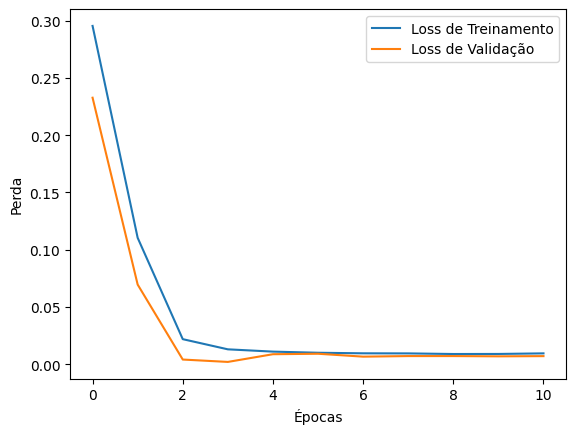

In [348]:
#Treinamento com dados Duas Unas - Camadas Congeladas
treinamento(lstm_model_treinado,X_train_U,y_train_U,0.0001,200,2)

In [349]:
# Congela as duas primeiras camadas LSTM e suas respectivas camadas dropout subsequentes

#lstm_model_treinado.layers[2] - Mostra o tipo da camada 2 do modelo
lstm_model_treinado.layers[0].trainable = True
lstm_model_treinado.layers[1].trainable = True
lstm_model_treinado.layers[2].trainable = True
lstm_model_treinado.layers[3].trainable = True
lstm_model_treinado.layers[2].trainable

True

In [350]:
lstm_model_final = lstm_model_treinado

Epoch 1/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - loss: 0.0082 - val_loss: 0.0068
Epoch 2/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - loss: 0.0066 - val_loss: 0.0042
Epoch 3/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - loss: 0.0069 - val_loss: 0.0051
Epoch 4/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - loss: 0.0060 - val_loss: 0.0063
Epoch 5/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - loss: 0.0054 - val_loss: 0.0058
Epoch 6/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - loss: 0.0052 - val_loss: 0.0047
Epoch 7/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - loss: 0.0047 - val_loss: 0.0034
Epoch 8/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - loss: 0.0041 - val_loss: 0.0033
Epoch 9/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - loss: 0.0042 - val_loss: 0.0042
Epoch 10/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - loss: 0.0038 - val_loss: 0.0032
Epoch 11/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - loss: 0.0040 - val_loss: 0.0011
Epoch 12/100000
13/13 ━━━━━━━━

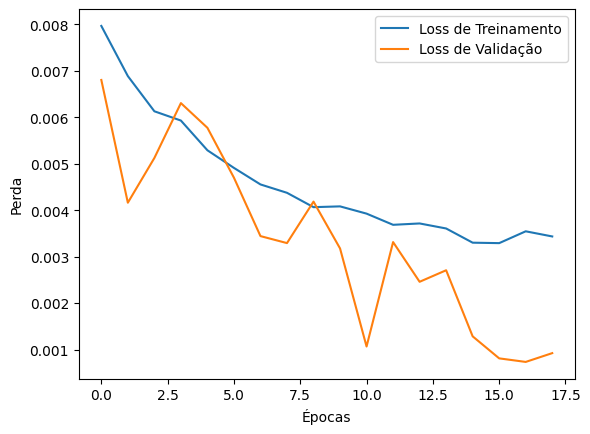

In [351]:
#Treinamento com dados Duas Unas - Camadas Descongeladas
treinamento(lstm_model_final,X_train_U,y_train_U,0.0001,200,2)

In [352]:
#Testes com os dados Duas Unas
teste2 = testes(lstm_model_final, X_test_U,y_test_U)

109/109 ━━━━━━━━━━━━━━━━━━━━ 29s 254ms/step
R^2 Score of LSTM model =  0.7227299316644555
 
MAE(Erro absoluto médio) Score of LSTM model =  0.09164417052236729
 
MSE(Erro quadrático médio) Score of LSTM model =  0.013146481890845932
 
MAPE(Erro percentual médio absoluto) Score of LSTM model = inf%


C:\Users\Renan Torres\AppData\Local\Temp\ipykernel_12720\1646825488.py:28: RuntimeWarning:

divide by zero encountered in divide



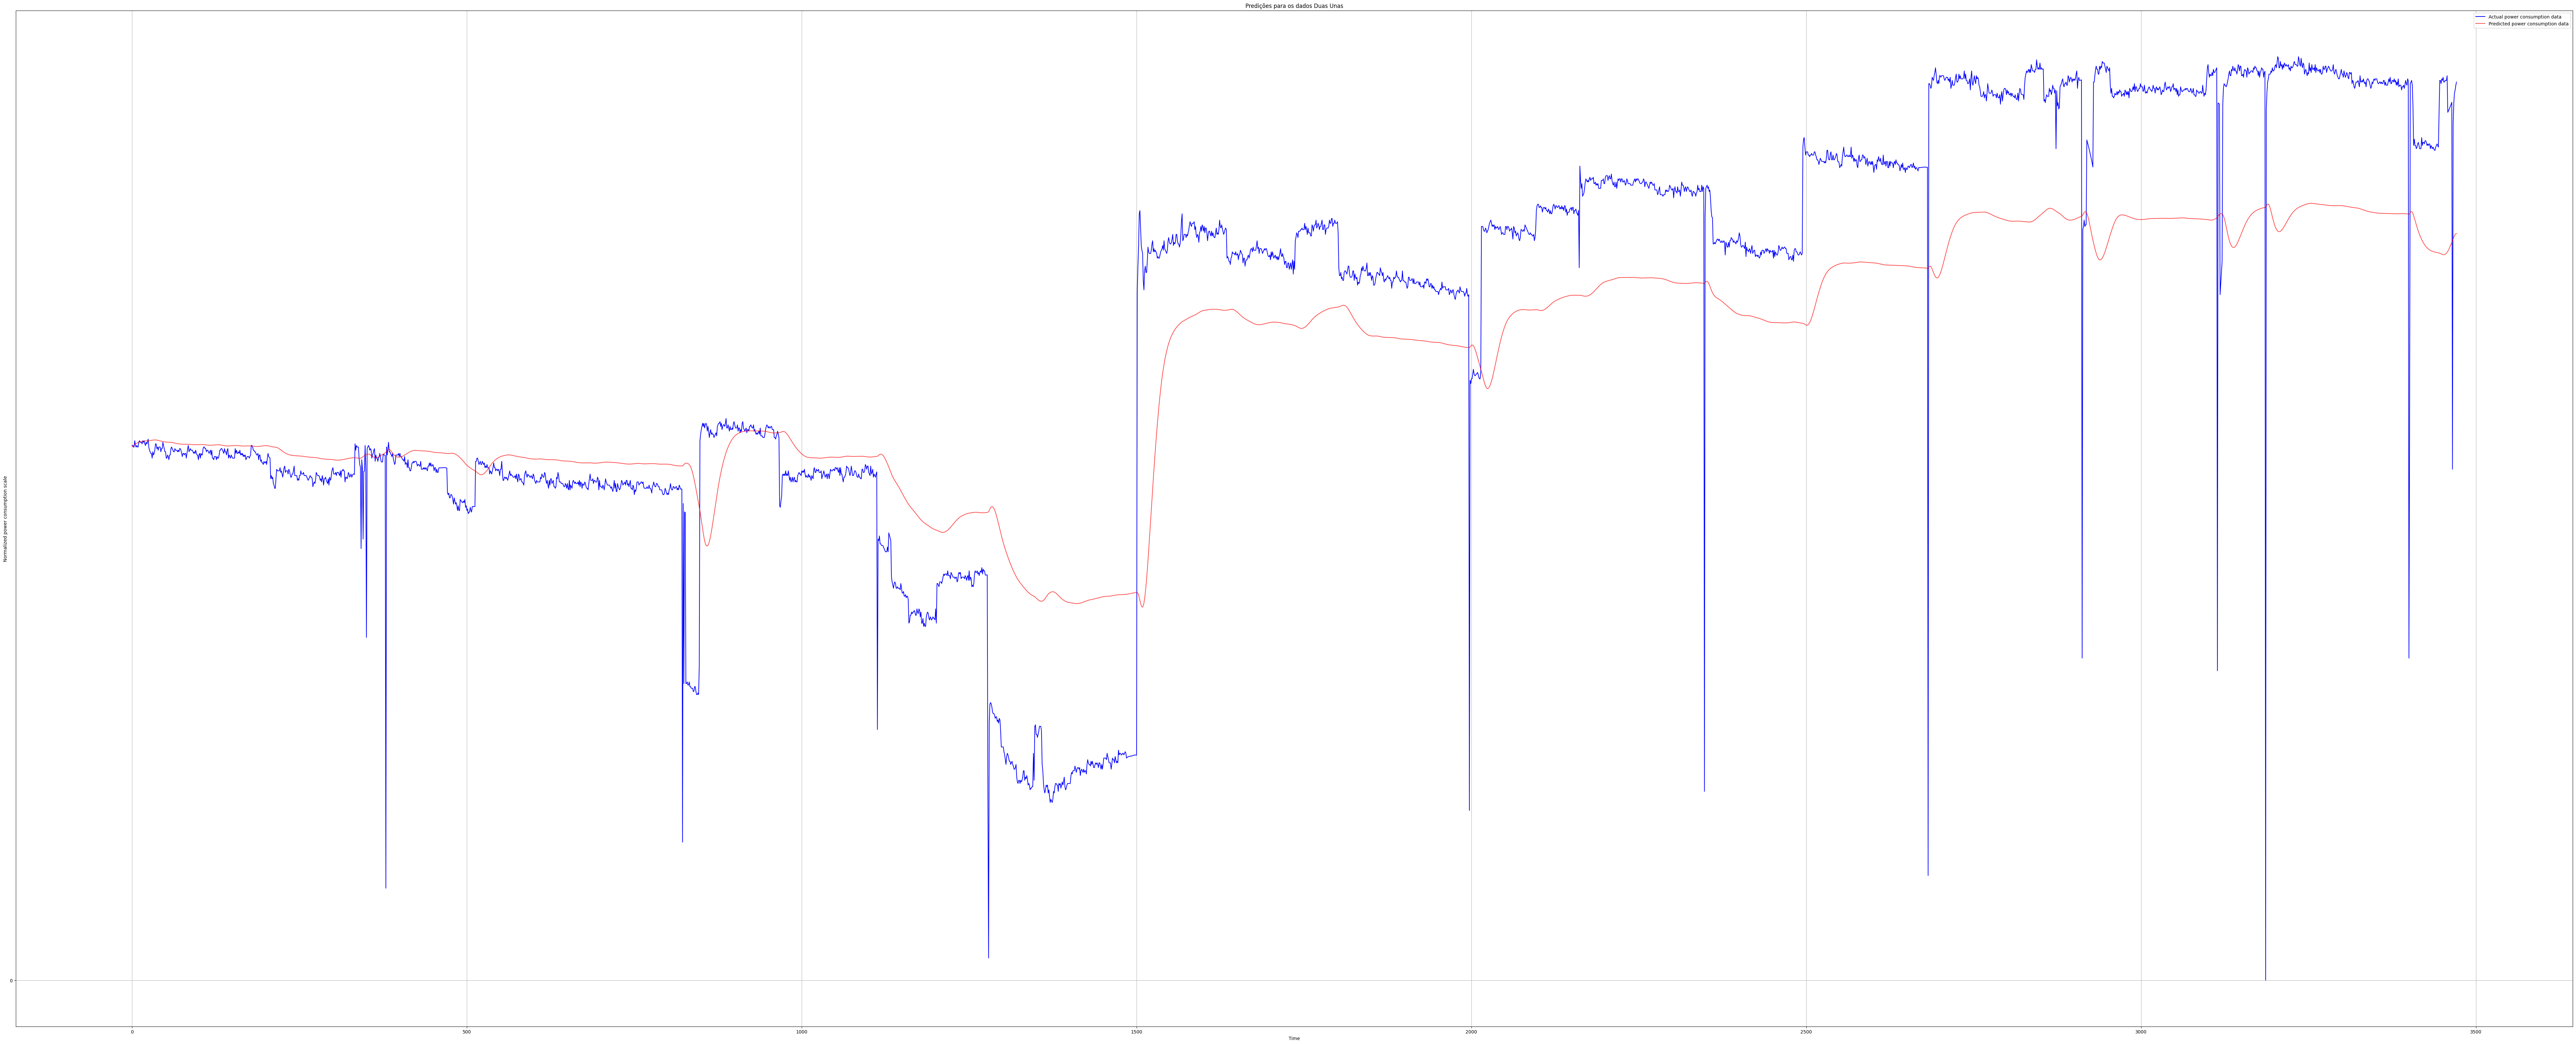

In [353]:
#Gráfico comparativo dos valores previstos e reais Duas Unas
plot_predictions_univar(y_test_U, teste2,"Predições para os dados Duas Unas")

In [354]:
def sequencia_completa(modelo,janela_entrada,janela_futuro,prediction):
    #print(janela_entrada)
    for i in range(janela_futuro):
        #print(janela_entrada[np.newaxis,:,:].shape)
        prediction.append(modelo.predict(janela_entrada[np.newaxis,:,:])[0,0]) #np.newaxis adiciona uma nova dimensão à janela_entrada, que se torna (1,n,1)
        #print(prediction[-1])
        janela_entrada = janela_entrada[1:]
        janela_entrada = np.insert(janela_entrada, (janela_entrada.shape[0]), prediction[-1], axis=0)
        #print(janela[-1])
        #print(janela_entrada)
    return prediction

In [355]:
# prediction = []
# janela_futuro = 720
# prediction = sequencia_completa(lstm_model_final,X_test_U[0],janela_futuro,prediction)

In [356]:
# Plot history and future
def plot_multistep(history, prediction1 , groundtruth):
    plt.figure(figsize=(20, 4))
    #y_mean = mean(prediction1)
    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))
    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')
    plt.legend(loc='upper right')
    #plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)
    plt.yticks(np.arange(0,1000,step=50))
    #plt.yticks(np.arange(0,1000,step=50))

In [357]:
#plot_multistep(X_test_U[0],prediction,y_plot_U[:janela_futuro])

In [358]:
lstm_model_final.save(f'{base_path}/lstm_model_treinado_etapa2(dados_com_filtro).keras')

In [359]:
# Caminho para o arquivo do modelo salvo no Google Drive
model_path =f'{base_path}/lstm_model_treinado_etapa2(dados_com_filtro).keras'

# Carregar o modelo
model = load_model(model_path)

# Verificar a arquitetura do modelo
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 200, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 200, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 200, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 200, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605,105 (2.31 MB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 403,404 (1.54 MB)

In [360]:
lstm_model_final.get_layer(name='lstm_1').get_weights()
model.get_layer(name='lstm_1').get_weights()
print(comparar_pesos(lstm_model_final.get_layer(name='lstm_1').get_weights(), model.get_layer(name='lstm_1').get_weights()))
print(comparar_pesos(lstm_model_final.get_layer(name='lstm_2').get_weights(), model.get_layer(name='lstm_2').get_weights()))
print(comparar_pesos(lstm_model_final.get_layer(name='lstm_3').get_weights(), model.get_layer(name='lstm_3').get_weights()))

True
True
True


In [361]:
X_test_U[0].shape

(200, 1)

In [362]:
prediction_multi_1 = []
janela = X_test_U[500]
janela_futuro_1 = 100 #2160

In [363]:
sequencia_completa(model,janela,janela_futuro_1,prediction_multi_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


[0.5576369,
 0.55688,
 0.5560868,
 0.55528384,
 0.5545082,
 0.5537988,
 0.55318594,
 0.5526934,
 0.5523342,
 0.55211395]

In [364]:
def transf_inversa(dados,max,min):
    de_padr = []
    for i in range(len(dados)):
        val_norm = dados[i]
        val_norm = val_norm*(max-min)+min
        de_padr.append(val_norm)

    return pd.DataFrame(de_padr)

In [365]:
print(X_test_U[0].shape)
print(len(prediction_multi_1))
print(y_plot_U[:janela_futuro_1].shape)

(200, 1)
10
(10,)


In [366]:
print(type(X_test_U))
print(type(prediction_multi_1))
print(type(y_plot_U))


<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


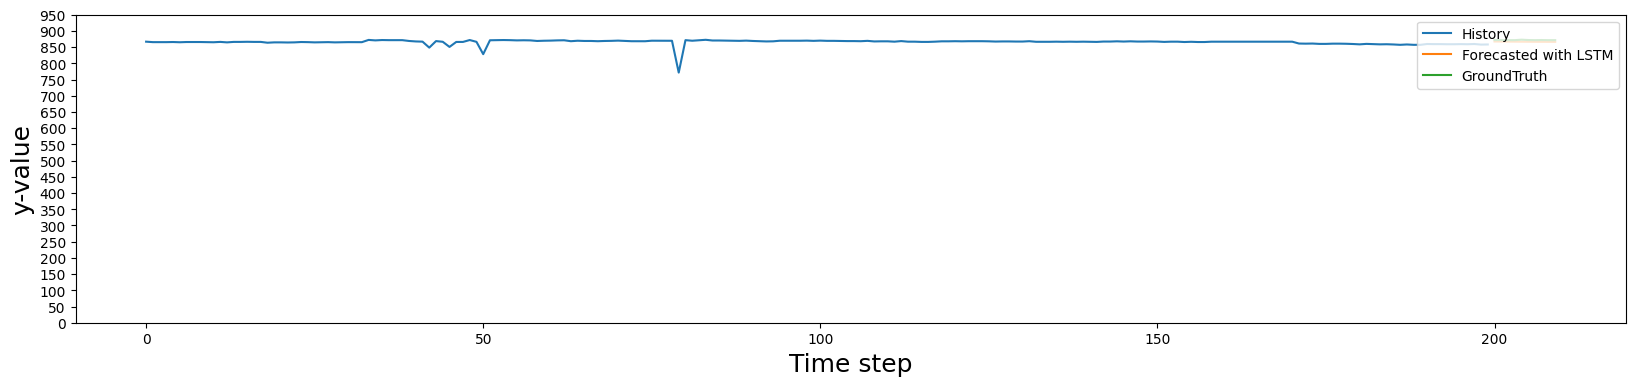

In [367]:
X_test_U_norm = transf_inversa(X_test_U[500],max_DU,min_DU)
prediction_norm = transf_inversa(prediction_multi_1,max_DU,min_DU)
y_plot_U_norm = transf_inversa(y_plot_U[:janela_futuro_1],max_DU,min_DU)
print(type(X_test_U_norm))
print(type(prediction_norm))
print(type(y_plot_U_norm))
plot_multistep(X_test_U_norm,prediction_norm,y_plot_U_norm)

In [368]:
lstm_score = r2_score(y_plot_U[:janela_futuro_1], prediction_multi_1)   # Relacionado à regressão linear dos valores verdadeiros. É calculado com base no erro quadrático residual e erro total. O valor pode ser interpretado como a proporção dos valores previstos que estão na linha criada pela regressão.
print("R^2 Score of LSTM model = ",lstm_score)
print(" ")

lstm_score2 = mean_absolute_error(y_plot_U[:janela_futuro_1], prediction_multi_1)
print("MAE(Erro absoluto médio) Score of LSTM model = ",lstm_score2)
print(" ")

lstm_score3 = mean_squared_error(y_plot_U[:janela_futuro_1], prediction_multi_1)
print("MSE(Erro quadrático médio) Score of LSTM model = ",lstm_score3)
print(" ")

lstm_score4 = mean_absolute_percentage_error(y_plot_U[:janela_futuro_1], prediction_multi_1)
print("MAPE(Erro percentual médio absoluto) Score of LSTM model = ",lstm_score4)

R^2 Score of LSTM model =  -146.93238946876116
 
MAE(Erro absoluto médio) Score of LSTM model =  0.024241953371316426
 
MSE(Erro quadrático médio) Score of LSTM model =  0.000593958649748984
 
MAPE(Erro percentual médio absoluto) Score of LSTM model =  0.04188113342704796


In [369]:
###################################################################################################

In [370]:
def incremento(X_train_U,y_train_U,y_test_U,janela_futuro):

  X_train_U_novo = np.reshape(X_train_U, (X_train_U.shape[0], seq_len)) #reshape em 2-dimension para poder concatenar
  X_test_U_2d = X_test_U[:janela_futuro].reshape(janela_futuro, -1) #reshape em 2-dimension para poder concatenar

  X_train_U_novo = pd.concat([pd.DataFrame(X_train_U_novo), pd.DataFrame(X_test_U_2d[:janela_futuro])], axis=0) #inicialmente X_test_U era transposto .T
  y_train_U_novo = pd.concat([pd.DataFrame(y_train_U), pd.DataFrame(y_test_U[:janela_futuro])], axis=0)

  X_train_U_novo = np.reshape(X_train_U_novo, (X_train_U_novo.shape[0], seq_len, 1)) #reshape em 3-dimension pq a rede LSTM exige entrada 3-dimension

  print(X_train_U_novo.shape)
  print(y_train_U_novo.shape)

  print(np.any(np.isnan(X_train_U_novo)), np.any(np.isnan(y_train_U_novo)))
  print(np.any(np.isinf(X_train_U_novo)), np.any(np.isinf(y_train_U_novo)))

  return X_train_U_novo, y_train_U_novo



In [371]:
X_train_U.shape

(3672, 200, 1)

In [372]:
prediction_multi_2 = []
janela_2 = X_test_U[1080]
janela_futuro_2 = 2160

X_train_n, y_train_n = incremento(X_train_U,y_train_U,y_test_U,janela_futuro_1)

treinamento(model,X_train_n,y_train_n,0.0001,200,20)

sequencia_completa(model,janela_2,janela_futuro_1,prediction_multi_2)

(3682, 200, 1)
(3682, 1)
False False
False False
Epoch 1/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - loss: 0.0040 - val_loss: 5.4851e-04
Epoch 2/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step - loss: 0.0038 - val_loss: 6.1232e-04
Epoch 3/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - loss: 0.0035 - val_loss: 7.6866e-04
Epoch 4/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - loss: 0.0035 - val_loss: 0.0014
Epoch 5/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - loss: 0.0031 - val_loss: 0.0014
Epoch 6/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - loss: 0.0034 - val_loss: 0.0012
Epoch 7/100000
13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - loss: 0.0029 - val_loss: 8.9701e-04
Epoch 8/100000
 8/13 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - loss: 0.0032

KeyboardInterrupt: 

In [ ]:
plot_multistep(X_test_U[1080],prediction_multi_2,y_plot_U[janela_futuro_1:janela_futuro_2])

In [ ]:
lstm_score = r2_score(y_plot_U[janela_futuro_1:janela_futuro_2], prediction_multi_2)   # Relacionado à regressão linear dos valores verdadeiros. É calculado com base no erro quadrático residual e erro total. O valor pode ser interpretado como a proporção dos valores previstos que estão na linha criada pela regressão.
print("R^2 Score of LSTM model = ",lstm_score)
print(" ")

lstm_score2 = mean_absolute_error(y_plot_U[janela_futuro_1:janela_futuro_2], prediction_multi_2)
print("MAE(Erro absoluto médio) Score of LSTM model = ",lstm_score2)
print(" ")

lstm_score3 = mean_squared_error(y_plot_U[janela_futuro_1:janela_futuro_2], prediction_multi_2)
print("MSE(Erro quadrático médio) Score of LSTM model = ",lstm_score3)
print(" ")

lstm_score4 = mean_absolute_percentage_error(y_plot_U[janela_futuro_1:janela_futuro_2], prediction_multi_2)
print("MAPE(Erro percentual médio absoluto) Score of LSTM model = ",lstm_score4)

In [ ]:
###################################################################################################

In [ ]:
# LSTM MULTISTEP - Implementação 2 (modelo Saulo)

# prediction_multi = []
# janela = X_test_U[0]
# janela_futuro = 24

# for j in range((int(X_test_U.shape[0]/janela_futuro)-80)):
#     if j == 0:
#         sequencia_completa(lstm_model_final,janela,janela_futuro,prediction_multi)
#     else:

#         X_train_U = np.reshape(X_train_U, (X_train_U.shape[0], seq_len)) #reshape em 2-dimension para poder concatenar

#         X_train_U = pd.concat([pd.DataFrame(X_train_U), pd.DataFrame(X_test_U[j-1].T)], axis=0)
#         y_train_U = pd.concat([pd.DataFrame(y_train_U), pd.DataFrame(y_test_U[j-1:j-1+seq_len])], axis=0)

#         X_train_U = np.reshape(X_train_U, (X_train_U.shape[0], seq_len, 1)) #reshape em 3-dimension pq a rede LSTM exige entrada 3-dimension

#         treinamento(lstm_model_final,X_train_U,y_train_U,0.0001,200,15)
        #treinamento(X_train,y_train)
#         janela = X_test_U[j]
#         sequencia_completa(lstm_model_final,janela,janela_futuro,prediction_multi)